In [ ]:
# Install required packages

In [1]:
!pip install pandas numpy matplotlib opencv-python-headless scikit-learn pillow
!pip install joblib

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import joblib
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from joblib import dump, load

In [ ]:
# Load the data

In [3]:
normal_files=os.listdir(r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\NORMAL")
print(normal_files[0:5])
print(normal_files[-5:])

['IM-0115-0001.jpeg', 'IM-0117-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0122-0001.jpeg', 'IM-0125-0001.jpeg']
['NORMAL2-IM-1406-0001.jpeg', 'NORMAL2-IM-1412-0001.jpeg', 'NORMAL2-IM-1419-0001.jpeg', 'NORMAL2-IM-1422-0001.jpeg', 'NORMAL2-IM-1423-0001.jpeg']


In [4]:
Pneumonia_files=os.listdir(r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\PNEUMONIA")
print(Pneumonia_files[0:5])
print(Pneumonia_files[-5:])

['person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg']
['person99_virus_183.jpeg', 'person9_bacteria_38.jpeg', 'person9_bacteria_39.jpeg', 'person9_bacteria_40.jpeg', 'person9_bacteria_41.jpeg']


In [ ]:
# Labels

In [5]:
print('Normal: ', len(normal_files))
print('Pneumonia: ',len(Pneumonia_files))

Normal:  1341
Pneumonia:  3875


In [6]:
Normal_label=[0]*1341
Pneumonia_label=[1]*3875

In [7]:
print('Normal labels: ',len(Normal_label))
print('Pneumonia labels: ',len(Pneumonia_label))

Normal labels:  1341
Pneumonia labels:  3875


In [8]:
print('With Normal labels: ', Normal_label[0:5])
print('Without Pneumonia labels: ', Pneumonia_label[0:5])

With Normal labels:  [0, 0, 0, 0, 0]
Without Pneumonia labels:  [1, 1, 1, 1, 1]


In [9]:
labels=Normal_label + Pneumonia_label

print('Labels are: ',len(labels))

print(labels[0:5])
print(labels[-5:])

Labels are:  5216
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [10]:
type(labels)

list

In [ ]:
# Visualize sample images

Text(0.5, 1.0, 'Normal')

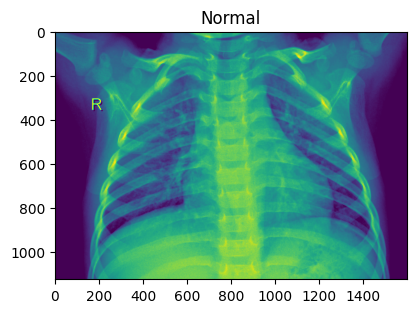

In [11]:
image_normal=mpimg.imread(r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\NORMAL\IM-0125-0001.jpeg")
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_normal)
plt.title('Normal')

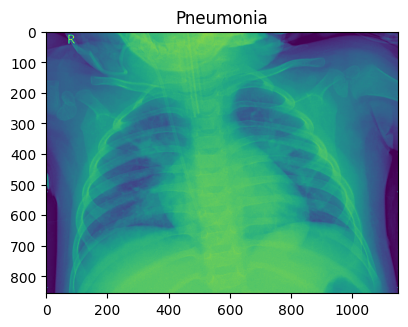

In [17]:
image_pneumonia=mpimg.imread(r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\PNEUMONIA\person9_bacteria_39.jpeg")
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 2)
plt.imshow(image_pneumonia)
plt.title('Pneumonia')
plt.show()

In [ ]:
# Image Processing

In [18]:
normal_path=(r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\NORMAL\\")
data=[]
labels=[]

for img_file in normal_files:
    image=Image.open(normal_path +img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)
    labels.append(0)
    
Pneumonia_path=(r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\PNEUMONIA\\")

for img_file in Pneumonia_files:
    image=Image.open(Pneumonia_path + img_file )
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)
    labels.append(1)

In [19]:
type(data)

list

In [20]:
len(data)

5216

In [21]:
data[0]

array([[[22, 22, 22],
        [19, 19, 19],
        [16, 16, 16],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [95, 95, 95]],

       [[22, 22, 22],
        [19, 19, 19],
        [16, 16, 16],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [93, 93, 93]],

       [[21, 21, 21],
        [19, 19, 19],
        [16, 16, 16],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [91, 91, 91]],

       ...,

       [[29, 29, 29],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [30, 30, 30],
        [32, 32, 32],
        [32, 32, 32]],

       [[30, 30, 30],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [58, 58, 58]],

       [[41, 41, 41],
        [40, 40, 40],
        [39, 39, 39],
        ...,
        [96, 96, 96],
        [97, 97, 97],
        [98, 98, 98]]], dtype=uint8)

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [ ]:
#Converting data and labels into numpy array

In [28]:
X=np.array(data)
Y=np.array(labels)

In [29]:
type(X)

numpy.ndarray

In [30]:
type(Y)

numpy.ndarray

In [31]:
print(X.shape)
print(Y.shape)

(5216, 128, 128, 3)
(5216,)


In [ ]:
#Train Test Split

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(5216, 128, 128, 3) (4172, 128, 128, 3) (1044, 128, 128, 3)


In [ ]:
# Scaled the data

In [34]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [35]:
X_train[0]

array([[[ 63,  63,  63],
        [ 79,  79,  79],
        [ 85,  85,  85],
        ...,
        [ 97,  97,  97],
        [101, 101, 101],
        [106, 106, 106]],

       [[ 62,  62,  62],
        [ 79,  79,  79],
        [ 84,  84,  84],
        ...,
        [104, 104, 104],
        [107, 107, 107],
        [110, 110, 110]],

       [[ 62,  62,  62],
        [ 78,  78,  78],
        [ 84,  84,  84],
        ...,
        [110, 110, 110],
        [111, 111, 111],
        [112, 112, 112]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [36]:
X_train_scaled[0]

array([[[0.24705882, 0.24705882, 0.24705882],
        [0.30980392, 0.30980392, 0.30980392],
        [0.33333333, 0.33333333, 0.33333333],
        ...,
        [0.38039216, 0.38039216, 0.38039216],
        [0.39607843, 0.39607843, 0.39607843],
        [0.41568627, 0.41568627, 0.41568627]],

       [[0.24313725, 0.24313725, 0.24313725],
        [0.30980392, 0.30980392, 0.30980392],
        [0.32941176, 0.32941176, 0.32941176],
        ...,
        [0.40784314, 0.40784314, 0.40784314],
        [0.41960784, 0.41960784, 0.41960784],
        [0.43137255, 0.43137255, 0.43137255]],

       [[0.24313725, 0.24313725, 0.24313725],
        [0.30588235, 0.30588235, 0.30588235],
        [0.32941176, 0.32941176, 0.32941176],
        ...,
        [0.43137255, 0.43137255, 0.43137255],
        [0.43529412, 0.43529412, 0.43529412],
        [0.43921569, 0.43921569, 0.43921569]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [37]:
X_train_flattened = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flattened = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

print(f"Flattened Train Data Shape: {X_train_flattened.shape}")
print(f"Flattened Test Data Shape: {X_test_flattened.shape}")

Flattened Train Data Shape: (4172, 49152)
Flattened Test Data Shape: (1044, 49152)


In [ ]:
# Train an SVM model

In [38]:
svm_model = svm.SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_flattened, Y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Make predictions

In [39]:
Y_pred = svm_model.predict(X_test_flattened)

In [ ]:
# Evaluate the model

In [40]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred, target_names=['Normal', 'Pneumonia']))

Accuracy: 0.9569

Classification Report:
              precision    recall  f1-score   support

      Normal       0.93      0.91      0.92       278
   Pneumonia       0.97      0.97      0.97       766

    accuracy                           0.96      1044
   macro avg       0.95      0.94      0.94      1044
weighted avg       0.96      0.96      0.96      1044



In [ ]:
# Confusion Matrix

In [41]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[253  25]
 [ 20 746]]


In [ ]:
# Plot Confusion Matrix

([<matplotlib.axis.YTick at 0x22105290890>,
 [Text(0, 0, 'Normal'), Text(0, 1, 'Pneumonia')])

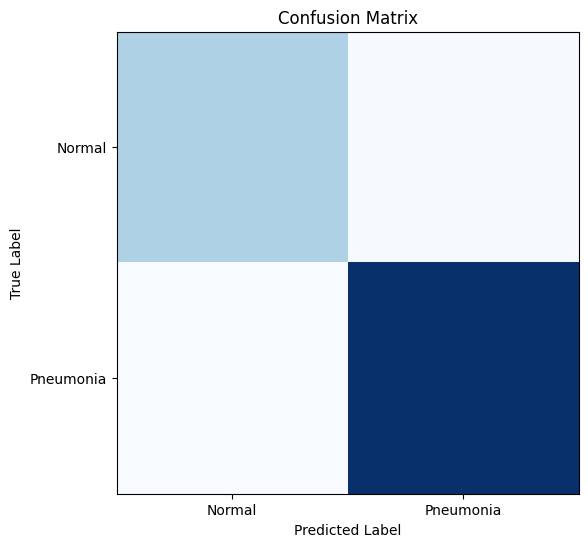

In [42]:
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Normal', 'Pneumonia'])
plt.yticks([0, 1], ['Normal', 'Pneumonia'])

In [ ]:
# Add values to the confusion matrix plot

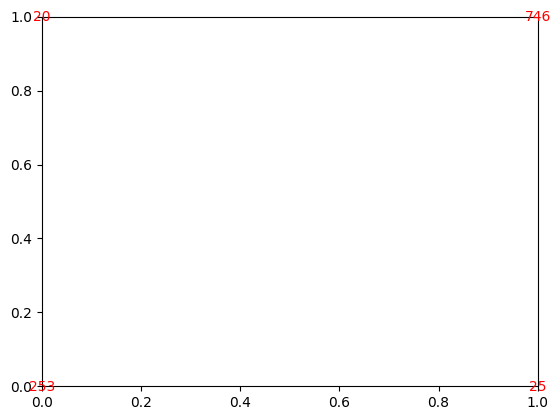

In [43]:
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')

plt.show()

In [ ]:
# Plot Accuracy

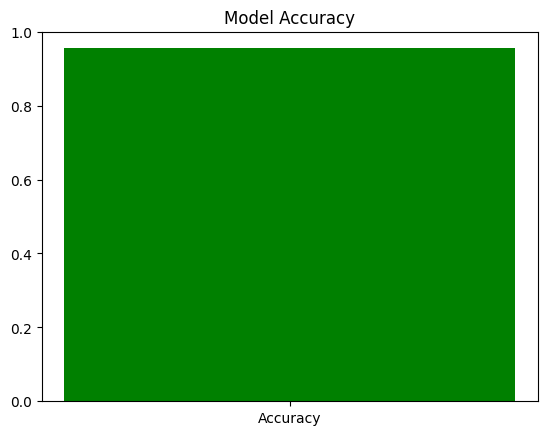

In [44]:
fig, ax = plt.subplots()
ax.bar(['Accuracy'], [accuracy], color='green')
ax.set_ylim([0, 1])
ax.set_title('Model Accuracy')
plt.show()

In [ ]:
# Model Save

In [45]:
model_filename = 'svm_pneumonia_model_best.joblib'
dump(svm_model, model_filename)
print(f"Model saved as {model_filename}")

Model saved as svm_pneumonia_model_best.joblib


In [ ]:
# Check predictions

In [47]:
# Function to predict the class of an image
def predict_image(image_path):
    try:
        # Open the image
        image = Image.open(image_path)
        image = image.resize((128, 128))  # Resize to match the input shape of the model
        image = image.convert('RGB')  # Convert to RGB format
        image = np.array(image)  # Convert to a NumPy array
        image = image.flatten().reshape(1, -1)  # Flatten and reshape for prediction

        # Load the trained model
        model = load(model_filename)

        # Make prediction
        prediction = model.predict(image)
        return "Pneumonia" if prediction[0] == 1 else "Normal"
    
    except FileNotFoundError:
        return f"File not found: {image_path}"
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Specify the new image path for prediction
new_image_path =r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Check_Data\0001 (7).jpeg"

# Get prediction
result = predict_image(new_image_path)
print(f"The prediction for the new image is: {result}")

The prediction for the new image is: Pneumonia


In [48]:
# Function to predict the class of an image
def predict_image(image_path):
    try:
        # Open the image
        image = Image.open(image_path)
        image = image.resize((128, 128))  # Resize to match the input shape of the model
        image = image.convert('RGB')  # Convert to RGB format
        image = np.array(image)  # Convert to a NumPy array
        image = image.flatten().reshape(1, -1)  # Flatten and reshape for prediction

        # Load the trained model
        model = load(model_filename)

        # Make prediction
        prediction = model.predict(image)
        return "Pneumonia" if prediction[0] == 1 else "Normal"
    
    except FileNotFoundError:
        return f"File not found: {image_path}"
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Specify the new image path for prediction
new_image_path =r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Check_Data\0001 (1).jpeg"

# Get prediction
result = predict_image(new_image_path)
print(f"The prediction for the new image is: {result}")

The prediction for the new image is: Normal
